<a href="https://colab.research.google.com/github/Hashiraee/tutorials/blob/main/tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 0: Setup**

### **First,** we install an additional package:

In [139]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Second,** we import the required packages again:

In [157]:
import os
import math
import warnings
import functools
import tqdm

# The packages we installed
import numpy as np
import pandas as pd

# Sklearn packages for ML
import sklearn.metrics
import sklearn.model_selection
import sklearn.cluster
import sklearn.preprocessing
import sklearn.decomposition
from yellowbrick.cluster import KElbowVisualizer

# Statistical package for OLS
import statsmodels.api as sm

# Importing packages related to plotting
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

# Some settings for the plotting packages.
sns.set(style="ticks")
sns.set_style("whitegrid")

plt.rcParams.update(
    {
        "figure.figsize": (10, 8),
        "axes.titlesize": 20,
        "axes.labelsize": 15,
        "legend.fontsize": 15,
        "axes.grid": True,
        "axes.axisbelow": True,
        "pcolor.shading": "auto",
    }
)

my_colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]
coef_age = 2
coef_education = 5

# **Part 1: Exploratory Data Analysis**

## **Loading Data**

The **pandas** library has a DataFrame class.

In [29]:
# Reading the data, by specifying the path to the data
data_path = "drive/MyDrive/Colab Notebooks/data.parquet"

# Here, the data object is an instance of the DataFrame class.
data = pd.read_parquet(data_path)

After **loading the data**, let us see what it looks like:

In [30]:
# We can see the columns and the data type (Dtype) with .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   shopper_id                450 non-null    object 
 1   average_revenue           450 non-null    float64
 2   average_basket_size       450 non-null    float64
 3   fraction_canned_food      450 non-null    float64
 4   fraction_national_brands  450 non-null    float64
 5   segment_name              450 non-null    object 
 6   is_cherry_picker          450 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 28.1+ KB


### **Data content:** what are we working with?
The dataset consists of 450 observations (450 shoppers):

* `shopper_id`(object): The loyalty program ID.
* `average_revenue`(float64): Average monthly spending in USD (i.e., revenue).
* `average_basket_size`(float64): Average basket size per shopping trip (i.e., number of SKUs purchased on a trip).
* `fraction_canned_food`(float64): Fraction of purchases that are canned food products.
* `fraction_national_brands`(float64): Fraction of purchases that are products manufactured by national brands.
* `segment_name`(object): The segment each customer was assigned.
* `is_cherry_picker`(int64): The loyalty program ID.

### **What do the observations (rows) of the data look like?**

We often use the `.head()` or `.tail()` methods to look how a few of the observations look like

The .head(n) shows the first n observations of the dataset, default n = 5.

In [31]:
data.head()

,shopper_id,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,segment_name,is_cherry_picker
0,shopper_000,141.817975,3.541991,0.165028,0.077541,The Obnoxious Teens,0
1,shopper_001,144.396016,3.860022,0.163544,0.069220,The Obnoxious Teens,1
2,shopper_002,130.580378,3.761713,0.149754,0.067993,The Obnoxious Teens,0
3,shopper_003,167.258689,3.555836,0.145920,0.067840,The Obnoxious Teens,0
4,shopper_004,144.925715,4.021508,0.170981,0.078963,The Obnoxious Teens,0


In [32]:
data.tail()

,shopper_id,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,segment_name,is_cherry_picker
145,shopper_445,587.467485,44.225649,0.230167,0.064235,The Prepper,1
146,shopper_446,498.108805,32.448675,0.210713,0.055606,The Prepper,0
147,shopper_447,502.550763,38.304781,0.219645,0.067221,The Prepper,0
148,shopper_448,562.634494,51.018432,0.198177,0.073580,The Prepper,0
149,shopper_449,564.658163,31.917702,0.186912,0.063536,The Prepper,0


### Next, we look at some **summary statistics:**

In [33]:
data.describe()

,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,is_cherry_picker
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,378.464356,23.884672,0.194487,0.067881,0.460000
std,182.141639,15.409354,0.028280,0.009784,0.498952
min,90.757119,1.769286,0.138783,0.043475,0.000000
25%,160.378473,6.059692,0.171622,0.061535,0.000000
50%,425.914019,26.463476,0.193793,0.067127,0.000000
75%,520.202382,36.533924,0.216222,0.073704,1.000000
max,759.837484,56.032508,0.266659,0.099542,1.000000


### Lets now look at the segments, meet the sort of shoppers:

### The obnoxious teens:

<img src="https://github.com/sbstn-gbl/learning-from-big-data/blob/main/source/_static/img/type-teens.gif?raw=true" width="600">


### The prepper:
<img src="https://github.com/sbstn-gbl/learning-from-big-data/blob/main/source/_static/img/type-prepper.gif?raw=true" width="600">


### The shopper-for-hire:
<img src="https://github.com/sbstn-gbl/learning-from-big-data/blob/main/source/_static/img/type-shopper-hire.gif?raw=true" width="600">



In [34]:
# Here, we group the data by "segment_name" and count the number of unique "shopper_id" values for each group.
data.groupby("segment_name")["shopper_id"].count()

segment_name
The Obnoxious Teens     150
The Prepper             150
The Shopper-for-Hire    150
Name: shopper_id, dtype: int64

## **Data Preparation**

Earlier, we looked at **dictionaries**, lets create one here to map a certain segment to a number

In [35]:
map_segment_name_to_id = {
    name: ix for ix, name in enumerate(data["segment_name"].unique())
}

map_segment_name_to_id

{'The Obnoxious Teens': 0, 'The Shopper-for-Hire': 1, 'The Prepper': 2}

### This may look a bit complex, so lets deconstruct it step by step:

In [36]:
# Here, we extract the unique segment (names) from the data.
unique_segments = data["segment_name"].unique()
unique_segments

array(['The Obnoxious Teens', 'The Shopper-for-Hire', 'The Prepper'],
      dtype=object)

**Next**, we create an _empty_ dictionary which we will populate later.

In [37]:
# Next, we initialize an empty dictionary, we will then use "key": "value"
map_segment_name_to_id = {}

# It is currently empty
map_segment_name_to_id

{}

**Here** we encounter our first built-in **function** in python: `len()`.

In [38]:
# How many unique segments are there?
number_of_unique_segments = len(unique_segments)
number_of_unique_segments

3

In [39]:
# Next, we populate the empty dictionary
for unique_segment in range(number_of_unique_segments):
    name = unique_segments[unique_segment]
    map_segment_name_to_id[name] = unique_segment

map_segment_name_to_id

{'The Obnoxious Teens': 0, 'The Shopper-for-Hire': 1, 'The Prepper': 2}

### For data-analysis purposes, we would like to have "number":"segment_name" instead:

In [40]:
# Creating an empty dictionary again
map_segment_id_to_name = {}

map_segment_id_to_name = {
    map_segment_name_to_id[name]: name for name in map_segment_name_to_id
}
map_segment_id_to_name

{0: 'The Obnoxious Teens', 1: 'The Shopper-for-Hire', 2: 'The Prepper'}

In [41]:
# Or, if you prefer, the step-by-step way:
map_segment_id_to_name = {}

In [42]:
map_segment_name_to_id.items()

dict_items([('The Obnoxious Teens', 0), ('The Shopper-for-Hire', 1), ('The Prepper', 2)])

In [43]:
# So, mapping them after looking at the contents
for name, id in map_segment_name_to_id.items():
    map_segment_id_to_name[id] = name
map_segment_id_to_name

# Again, the same result.

{0: 'The Obnoxious Teens', 1: 'The Shopper-for-Hire', 2: 'The Prepper'}

## **Now let us apply our mapping of segments to numbers to our original data (adding a new column):**

**Now**, we create a new feature/column such that we have segment_id's.

In [44]:
# Here, we create a new column using our previously constructed dictionary
data["segment_id"] = data["segment_name"].map(map_segment_name_to_id)

In [45]:
# Lets look at a few rows again:
data.head()

,shopper_id,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,segment_name,is_cherry_picker,segment_id
0,shopper_000,141.817975,3.541991,0.165028,0.077541,The Obnoxious Teens,0,0
1,shopper_001,144.396016,3.860022,0.163544,0.069220,The Obnoxious Teens,1,0
2,shopper_002,130.580378,3.761713,0.149754,0.067993,The Obnoxious Teens,0,0
3,shopper_003,167.258689,3.555836,0.145920,0.067840,The Obnoxious Teens,0,0
4,shopper_004,144.925715,4.021508,0.170981,0.078963,The Obnoxious Teens,0,0


# **Defining the feature variables**

We only consider the variables we will use for further analysis:
* `average_revenue`: Average monthly revenue.
* `average_basket_size:` Average basket size per shopping trip. 
* `fraction_canned_food`: Fraction of bought items that are canned food.
* `fraction_national_brand`: Fraction of bought items that are manufactured by national brands such as Coca-Cola.


In [46]:
# Lets put all our variables into one variable:
feature_variables = [
    "average_revenue",
    "average_basket_size",
    "fraction_canned_food",
    "fraction_national_brands",
]

# **Part 2: Clustering with K-Means**

## **Types of Machine Learning (ML):**
*  **Supervised** learning uses **labeled** data
*  **Unsupervised** learning uses **unlabeled** data

### **Objective** of unsupervised ML:
Discover hidden patterns and structures in data.

**Requires _unlabeled_ data:**
*  Raw data without predefined labels.
*  Data exploration without specific target outcomes.
*  Unsupervised methods to find inherent relationships.

**Practical Applications:**
*  Clustering: group similar data points together.
*  Dimensionality reduction: reduce complexity and noise in data.

**Usage:**
*  Firms largely use (are _interested_ in) clustering and dimensionality reduction techniques.
*  The reason behind this interest in clustering and dimensionality reduction methods is that many analytical problems involve the understanding of complex relationships within large datasets.

**Examples:**
*  Identifying customer segments for targeted marketing.
*  Detecting anomalous behavior in financial transactions.
*  Discovering topics and themes in a large corpus of text documents.

## **How K-Means clustering works**

### **Simple Idea:** Assign a "point/observation" to a cluster `c` by:
*  **Initializing** `k` cluster centroids randomly.
*  **Assigning** each point to the _nearest_ centroid.
*  **Updating** the centroids by calculating the mean of all points assigned to each centroid.
*  **Repeating** the assignment and updating steps untill convergence is achieved.

![example image](https://raw.githubusercontent.com/Hashiraee/tutorials/main/img/kmeans_example.gif)

*  `k` is the predefined `hyperparameter`:
    *  A `hyperparameter` is a value/parameter set before training a machine learning model that controls the behavior of the algorithm and affects the model's performance.
    *  The algorithm depends/relies on your choice of distance metric between the points in your sample and the number of clusters you want to identify.

### **Creating**`X` (Features) **and** `y` (Target Variable).

**First**, we create two arrays for our prediction problem:
*  The **first array** (`X`) holds the `segment` data (our independent/**explanatory variable**).
* The **second array** (`y`) holds the variable of interest (the **dependent variable**, or variable to be explained).

**Lets look at the data again:**

In [54]:
data.head()

,shopper_id,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,segment_name,is_cherry_picker,segment_id
0,shopper_000,141.817975,3.541991,0.165028,0.077541,The Obnoxious Teens,0,0
1,shopper_001,144.396016,3.860022,0.163544,0.069220,The Obnoxious Teens,1,0
2,shopper_002,130.580378,3.761713,0.149754,0.067993,The Obnoxious Teens,0,0
3,shopper_003,167.258689,3.555836,0.145920,0.067840,The Obnoxious Teens,0,0
4,shopper_004,144.925715,4.021508,0.170981,0.078963,The Obnoxious Teens,0,0


**1.** Construct the **dependent variable** `y` that holds the segment_id's (which we want to predict later):

In [55]:
y = data["segment_id"].values

**2.** Construct the **explanatory variable** `X` that holds the variables used to predict the segments (by predicting the segment_id's).

In [56]:
# Here we select the variables which we will use as explanatory variables.
feature_variables = [
    "average_revenue",
    "average_basket_size",
    "fraction_canned_food",
    "fraction_national_brands",
]
feature_variables

['average_revenue',
 'average_basket_size',
 'fraction_canned_food',
 'fraction_national_brands']

In [57]:
X = data[feature_variables].values

**Now**, lets look at the size of our **dependent** variable `y` and **explanatory** variable `X` by using the `.shape` attribute of the numpy array:

In [58]:
print(f"Size of dependent variable: {y.shape}")
print(f"Size of explanatory variables: {X.shape}")

Size of dependent variable: (450,)
Size of explanatory variables: (450, 4)


## **k-Means with sklearn**
Build a model that can assign a customer to a specific segment/cluster using K-means clustering.

## **Scaling Variables**

### **Scaling Variables:** Z-score normalization (standardization)

Here, one transforms a variable/feature $x_i$ to have a mean of 0 and a standard deviation of 1:

$z_i = \frac{x_i - \bar{x}}{s}$

Where:
*  Z-score normalized sample observation $z_i$.
*  Original sample value $x_i$.
*  Mean of the sample $\bar{x}$.
*  Sample standard deviation $s$.

In [116]:
# Applying the z-score normalization scaling
data_standardized = sklearn.preprocessing.scale(
    data[feature_variables], with_mean=True, with_std=True)

**Mean** of the feature columns after scaling.

In [117]:
data_standardized.mean(axis=0)

array([-3.47376449e-16,  2.05267901e-16, -3.63166287e-16, -2.36847579e-16])

**Standard Deviation** of the feature columns after scaling.

In [118]:
data_standardized.std(axis=0)

array([1., 1., 1., 1.])

## **Determining the "optimal" value for `k`**
**Given** a set of N observations: $x_1, x_2, ..., x_N$, the K-means clustering algorithm seeks to minimize the **objective** function;

$J(C_1, C_2, ..., C_k) = \sum_{k=1}^{K}\left(\sum_{x_i \in C_k} ||x_i - \mu_k||^{2}\right)$.

Where:
*  $x_i \in C_k$, for $k = 1, 2, ..., K$,
*  $\mu_k$ is the **centroid** of **cluster** $C_k$,
*  $i = 1, 2, ..., N_k$, with $N_k$ corresponding to the number of observations in **cluster** $C_k$,
*  and the **total number of observations** correspond to $N = \sum_{k = 1}^{K}N_k$. 


### **Elbow** method/heuristic:
*  The elbow method is a heuristic used to determine the optimal number of clusters (k) for the k-means clustering algorithm. 

*  It involves computing the within-cluster sum of squares (WCSS) for different values of k and then selecting the k value that **minimizes** the WCSS while also **avoiding overfitting**. 

*  The elbow method is named as such because the plot of `WCSS` vs. `k` often resembles an 'arm' with an 'elbow', and the **optimal k** is located at the "elbow" point where the rate of decrease in WCSS starts to slow down.

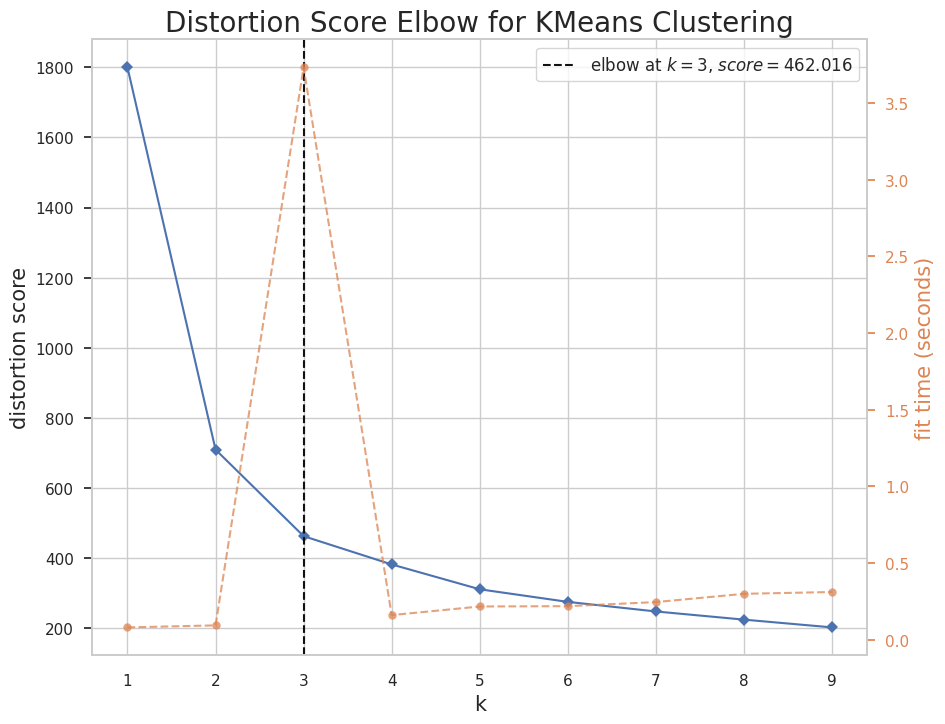

In [126]:
# Determine the number of 'optimal' clusters.
kmeans = sklearn.cluster.KMeans(random_state=42, n_init=100)
elbow = KElbowVisualizer(kmeans, k=(1, 10))
elbow.fit(data_standardized)
elbow.show()
plt.show()

## **Principle Component Analysis (PCA)** for dimensionality reduction

### **Simple Idea:** Reduce the dimensionality of a dataset using PCA:
*  **Compute:** the covariance of the original data.
*  **Extract:** the _eigenvectors_ and _eigenvalues_ from the covariance matrix.
*  **Select:** the top `k` _eigenvectors_ that correspond to the `k` largets _eigenvalues_.
*  **Transform:** the oriignal data using the selected _eigenvectors_ to obtain the prinicipal components.

*  `k` is the predefined `hyperparameter`:
    *  The algorithm depends/relies on your choice of the number of principal components to retain, which determines the level of dimensionality reduction.

### **TL;DR:**
**PCA** is a technique to transform high-dimension data into lower-dimension data (such as 3D to 2D) while preserving **as much information as possible**.

### **Note:** I just show this for plotting purposes.

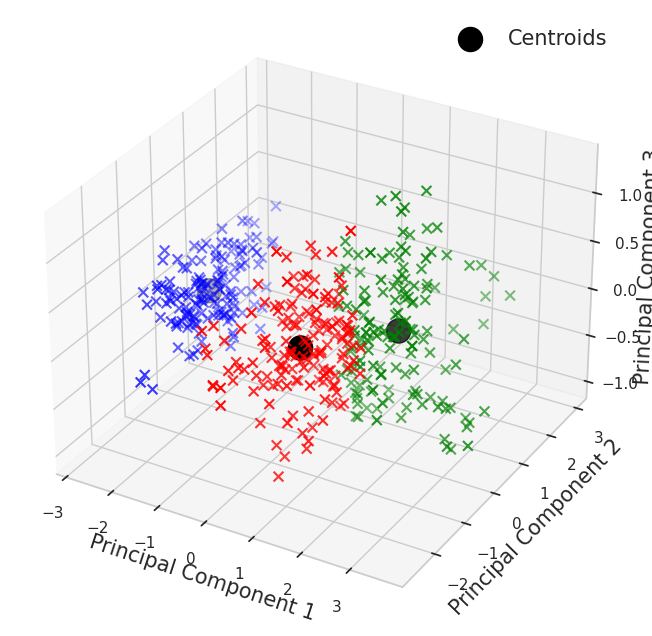

In [135]:
from mpl_toolkits.mplot3d import Axes3D

optimal_k = elbow.elbow_value_

# Perform k-means clustering with the optimal number of clusters
kmeans = sklearn.cluster.KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
cluster_labels = kmeans.fit_predict(data_standardized)

# Reduce dimensions to 3D using PCA
pca = sklearn.decomposition.PCA(n_components=3)
data_pca = pca.fit_transform(data_standardized)

# Create a custom color map with red, blue, and green
custom_cmap = matplotlib.colors.ListedColormap(['red', 'blue', 'green'])

# Create a 3D scatter plot of the PCA-transformed data, colored by cluster labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=cluster_labels, cmap=custom_cmap, marker='x', s=50)

# Plot the cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], c='black', marker='o', s=300, label='Centroids')

# Add labels and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

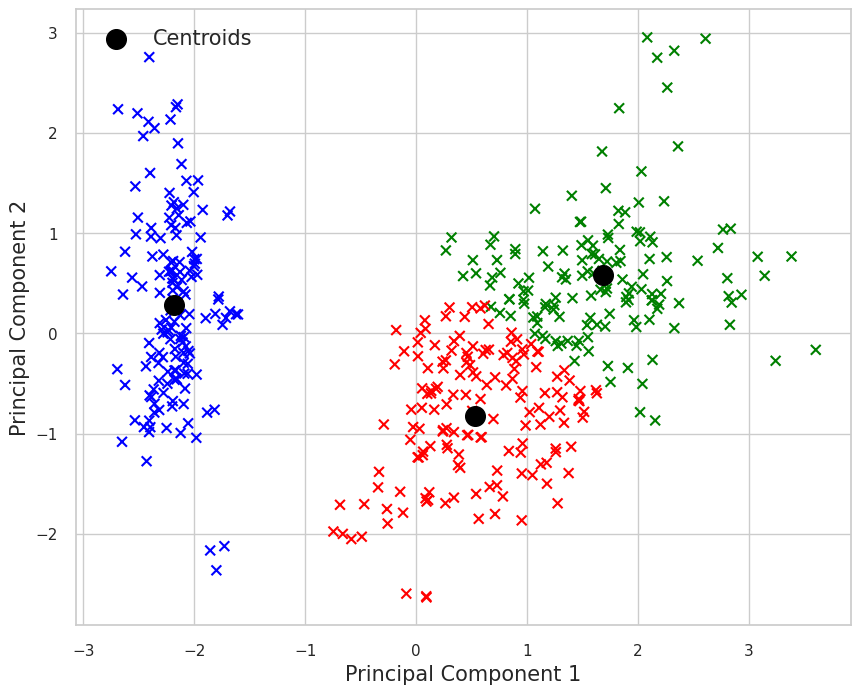

In [127]:
optimal_k = elbow.elbow_value_

# Perform k-means clustering with the optimal number of clusters
kmeans = sklearn.cluster.KMeans(n_clusters=optimal_k, random_state=42, n_init=100)
cluster_labels = kmeans.fit_predict(data_standardized)

# Reduce dimensions to 2D using PCA
pca = sklearn.decomposition.PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# Create a custom color map with red, blue, and green
custom_cmap = matplotlib.colors.ListedColormap(['red', 'blue', 'green'])

# Create a scatter plot of the PCA-transformed data, colored by cluster labels
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap=custom_cmap, marker='x', s=50)

# Plot the cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='o', s=200, label='Centroids')

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### **Assigning** the clusters (1, 2, 3) to the dataframe.

In [137]:
data["cluster_id"] = cluster_labels
data.head()

,shopper_id,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,segment_name,is_cherry_picker,segment_id,cluster_id
0,shopper_000,141.817975,3.541991,0.165028,0.077541,The Obnoxious Teens,0,0,1
1,shopper_001,144.396016,3.860022,0.163544,0.069220,The Obnoxious Teens,1,0,1
2,shopper_002,130.580378,3.761713,0.149754,0.067993,The Obnoxious Teens,0,0,1
3,shopper_003,167.258689,3.555836,0.145920,0.067840,The Obnoxious Teens,0,0,1
4,shopper_004,144.925715,4.021508,0.170981,0.078963,The Obnoxious Teens,0,0,1


In [138]:
data.tail()

,shopper_id,average_revenue,average_basket_size,fraction_canned_food,fraction_national_brands,segment_name,is_cherry_picker,segment_id,cluster_id
145,shopper_445,587.467485,44.225649,0.230167,0.064235,The Prepper,1,2,2
146,shopper_446,498.108805,32.448675,0.210713,0.055606,The Prepper,0,2,0
147,shopper_447,502.550763,38.304781,0.219645,0.067221,The Prepper,0,2,2
148,shopper_448,562.634494,51.018432,0.198177,0.073580,The Prepper,0,2,2
149,shopper_449,564.658163,31.917702,0.186912,0.063536,The Prepper,0,2,0


# **Part 3: Simulation Example**
One could ask, what are we trying to model? We build/construct a model to make an approximation to the true (unknown) **DGP Data Generating Process**.

Most of us are familiar with methods like linear regression (Ordinary Least Squares [OLS]), so let's look at an example:

In [144]:
# The true DGP will be (no surprise): 
# Income_i = coef_age * age_i + coef_education * years_education_i + e_i,
# where e ~ N(0,1)

# Setting the random seed for reproducibility
np.random.seed(42)

# Set the number of observations
n = 200

# Generate x_1 and x_2 as random values
x_1 = 80*np.random.rand(n)
x_2 = 20*np.random.rand(n)

# Generate normally distributed error term e
e = np.random.normal(0, 1, n)

# Create the linear model: y = coef_age * x_1 + coef_education * x_2 + e
y = coef_age * x_1 + coef_education * x_2 + 1 * + e
sim = pd.DataFrame({'Income': y, 'age': x_1, 'years_education': x_2})
sim = sim[sim["Income"] > 0]

## **Looking at the Data:**

In [147]:
# Combine the variables into a DataFrame
simulation_data = sim
data.head(10)

,Income,age,years_education
0,125.435062,29.963210,12.840633
1,160.549289,76.057145,1.682799
2,133.963855,58.559515,3.232574
3,185.330510,47.892679,17.971084
4,85.930055,12.481491,12.128581
5,25.748685,12.479562,0.183941
6,19.537528,4.646689,2.029431
7,205.533517,69.294092,13.270035
8,95.866340,48.089201,0.101232
9,131.464805,56.645806,3.216161


In [148]:
simulation_data.describe()

,Income,age,years_education
count,200.000000,200.000000,200.000000
mean,127.874335,38.720499,10.087503
std,54.851066,23.591314,5.860024
min,3.053981,0.441769,0.101232
25%,89.466038,18.286593,5.229250
50%,125.761654,39.558900,10.832798
75%,173.438337,60.548769,14.843986
max,235.657590,78.950955,19.810103


## **So,** what do we see?
*  The average income is: 127.874 * 1000 = 127874 dollars per year, not bad.
*  The average age is (almost) 39 year.
*  Let's look at a plot:

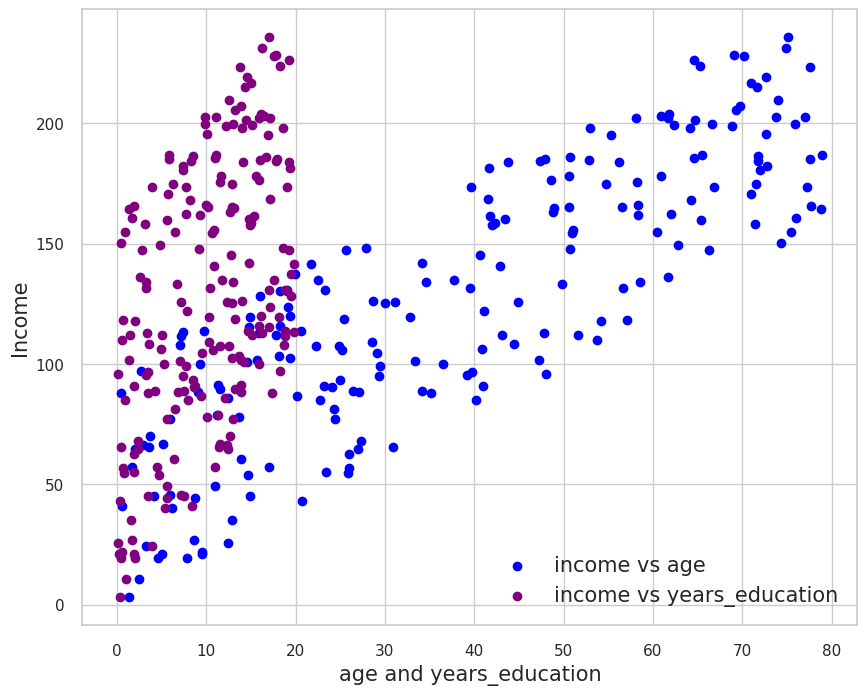

In [149]:
# Plot age, years_education, and income in the same graph
fig, ax = plt.subplots()
ax.scatter(data['age'], data['Income'], c='blue', label='income vs age')
ax.scatter(data['years_education'], data['Income'], c='purple', label='income vs years_education')
ax.set_xlabel('age and years_education')
ax.set_ylabel('Income')
ax.legend()
plt.show()

## **Estimated Model:**
$income_i = α + β ⋅ age_i + γ ⋅ years_education_i + ϵ_i$ where income is in thousands.

Where:
*  **Income:** is expressed in thousands of dollars.
*  **alpha $\alpha$:** is a constant term (intercept).
*  **beta $\beta$:** is the effect of age (in years) on income.
*  **gamma $\gamma$:** is the effect of years of education on income.
*  **epsilon $\epsilon$:** $\epsilon ~ N(0,1)$, some standard normally distributed noise (or shock).


In [158]:
# Load the data
df = simulation_data
df

,Income,age,years_education
0,125.435062,29.963210,12.840633
1,160.549289,76.057145,1.682799
2,133.963855,58.559515,3.232574
3,185.330510,47.892679,17.971084
4,85.930055,12.481491,12.128581
...,...,...,...
195,148.118314,27.936766,18.615147
196,202.264641,58.076454,17.168255
197,186.386806,71.768821,8.579881
198,216.781987,70.966914,15.017421


In [159]:
# Dependent variable, or variable to be explained
income = df['Income']
income

0      125.435062
1      160.549289
2      133.963855
3      185.330510
4       85.930055
          ...    
195    148.118314
196    202.264641
197    186.386806
198    216.781987
199    199.326811
Name: Income, Length: 200, dtype: float64

In [160]:
# Independent variables (explanatory variables)
X = df[['age', 'years_education']]
X

,age,years_education
0,29.963210,12.840633
1,76.057145,1.682799
2,58.559515,3.232574
3,47.892679,17.971084
4,12.481491,12.128581
...,...,...
195,27.936766,18.615147
196,58.076454,17.168255
197,71.768821,8.579881
198,70.966914,15.017421


In [161]:
# Here we add a constant
X = sm.add_constant(X)
X

,const,age,years_education
0,1.0,29.963210,12.840633
1,1.0,76.057145,1.682799
2,1.0,58.559515,3.232574
3,1.0,47.892679,17.971084
4,1.0,12.481491,12.128581
...,...,...,...
195,1.0,27.936766,18.615147
196,1.0,58.076454,17.168255
197,1.0,71.768821,8.579881
198,1.0,70.966914,15.017421


In [162]:
# Here, we estimate the model:
model = sm.OLS(income, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.045e+05
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:58:11   Log-Likelihood:                -280.54
No. Observations:                 200   AIC:                             567.1
Df Residuals:                     197   BIC:                             577.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0820      0.183     

## **Interesting,** so how do we interpret this?
**Note:** Income is expressed in thousands of dollars.

*  **AGE:** On average, an one year **increase** in age, results in an **increase** of 2.0001 * 1000 = 2000.10 dollars in income.
*  **YEARS_EDUCATION:** On average, an **additional** year of education results in an **increase** of 4.9910 * 1000 = 4991 dollars in income.

## **Now:** let us look at the residuals, which is the difference between:
*  The **actual** value y.
*  The **fitted** value $\hat{y}$.

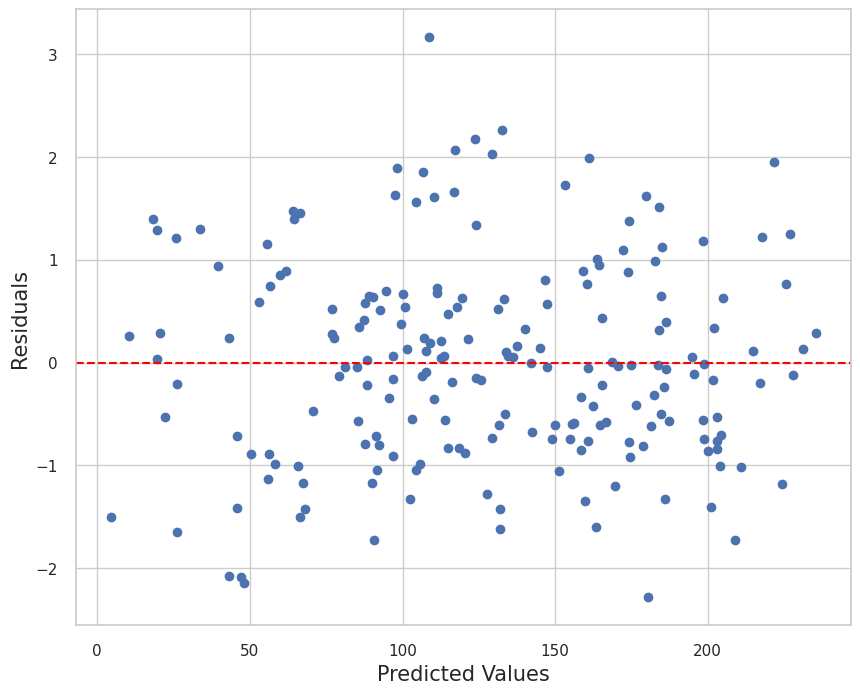

In [164]:
# Let us look at the residuals, difference between actual values and predicted values
residuals = model.resid

# Plot the residuals
fig, ax = plt.subplots()
ax.scatter(model.predict(), residuals)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
plt.show()

## **Now,** let's take a look at the distribution of the residuals:
*  Residuals: the differences between the actual values of income and the **so-called fitted values** of income.

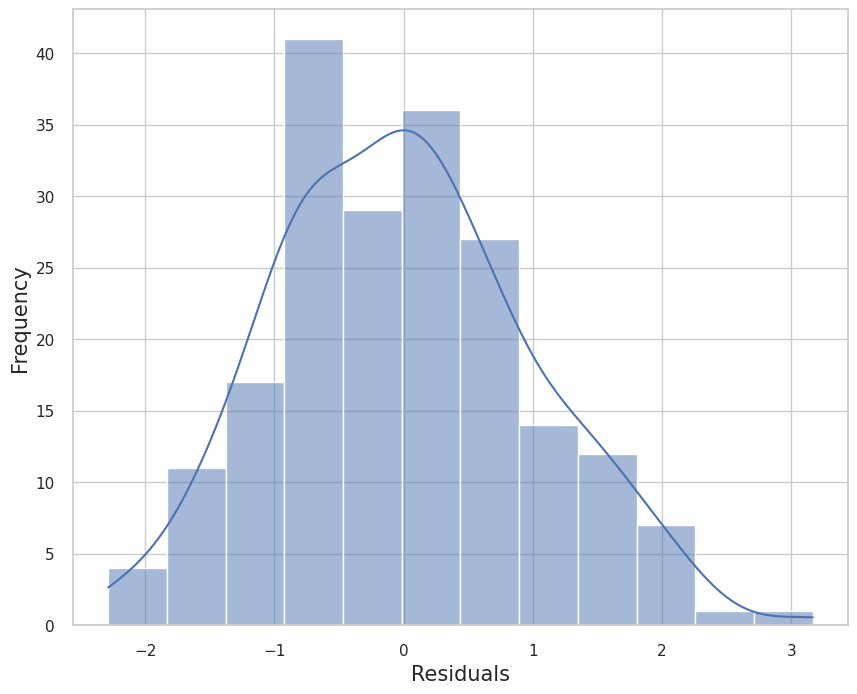

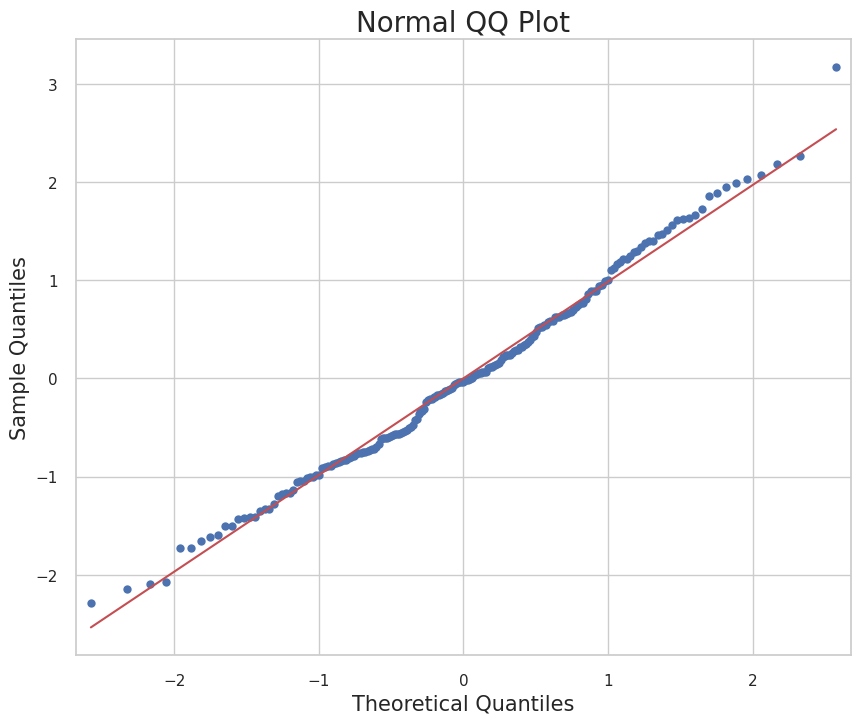

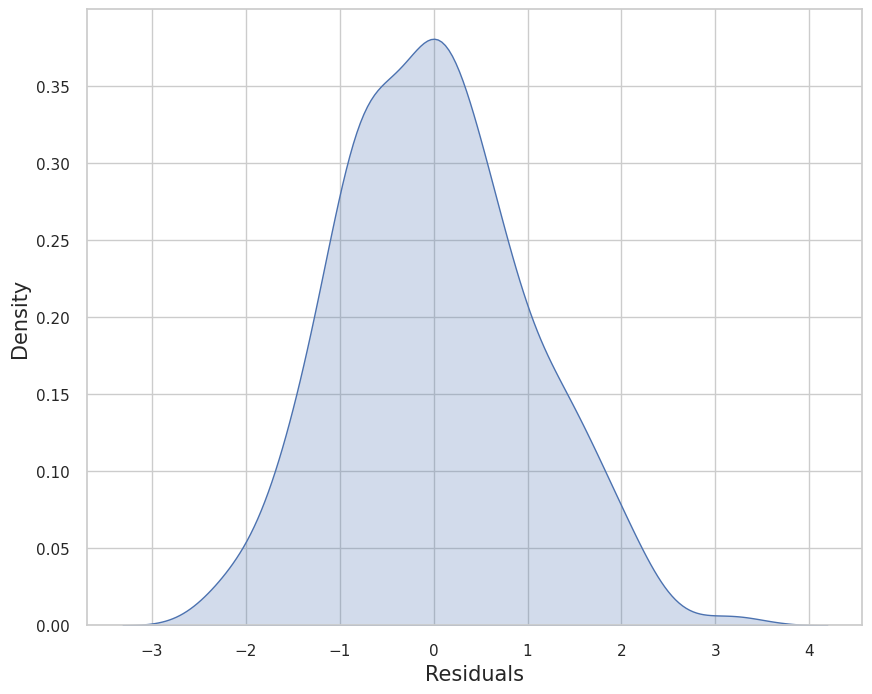

In [165]:
# Create a histogram of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Create a QQ plot of the residuals
fig, ax = plt.subplots()
sm.qqplot(residuals, ax=ax, line='s')
ax.set_title('Normal QQ Plot')
plt.show()

# Create a kernel density plot of the residuals
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## **Looks** relatively 'easy', but what can go wrong?

*  **In reality**, we do **not** know the **true DGP**. Let us consider an example where we 'forget' the years_educ variable:

In [166]:
# Load data
df_2 = simulation_data

# Dependent variable, or variable to be explained
income = df_2['Income']

# Independent variables (explanatory variables), we 'forget' years_education
X_2 = df_2['age']

# Here we add a constant
X_2 = sm.add_constant(X_2)

model_2 = sm.OLS(income, X_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     498.1
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           5.87e-56
Time:                        22:15:28   Log-Likelihood:                -958.49
No. Observations:                 200   AIC:                             1921.
Df Residuals:                     198   BIC:                             1928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7193      3.993     12.953      0.0

## **Now,** it asppears that the constant term (intercept) **does** matter, while it was not significantly different form 0 before.

*  Let us look at the residuals again:
*  They look quite different, look at the vertical axes.

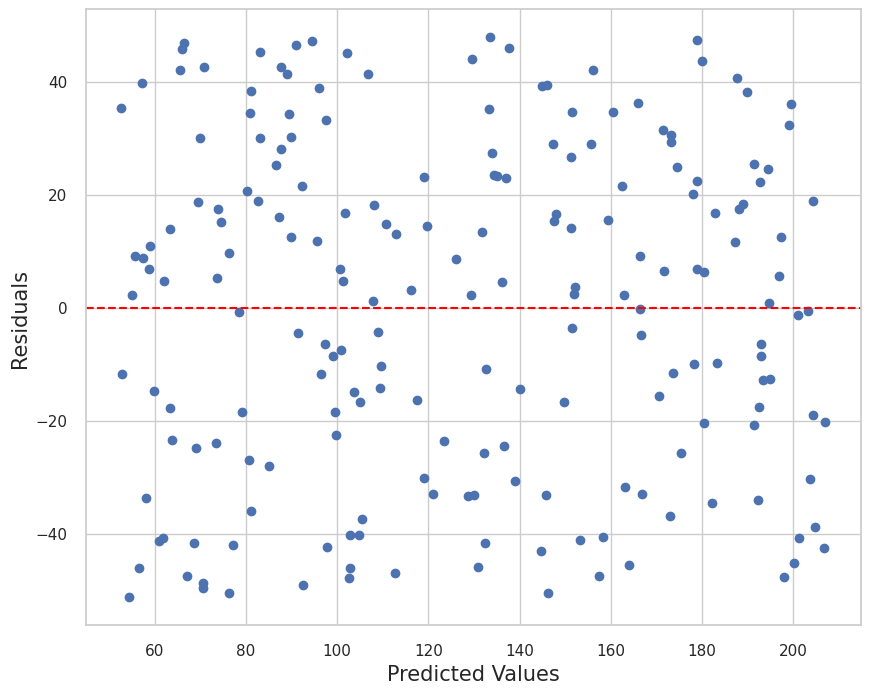

In [167]:
# Let us look at the residuals, difference between actual values and predicted values
residuals_2 = model_2.resid

# Plot the residuals
fig_2, ax_2 = plt.subplots()
ax_2.scatter(model_2.predict(), residuals_2)
ax_2.axhline(y=0, color='red', linestyle='--')
ax_2.set_xlabel('Predicted Values')
ax_2.set_ylabel('Residuals')
plt.show()

## **How about the residuals now?**

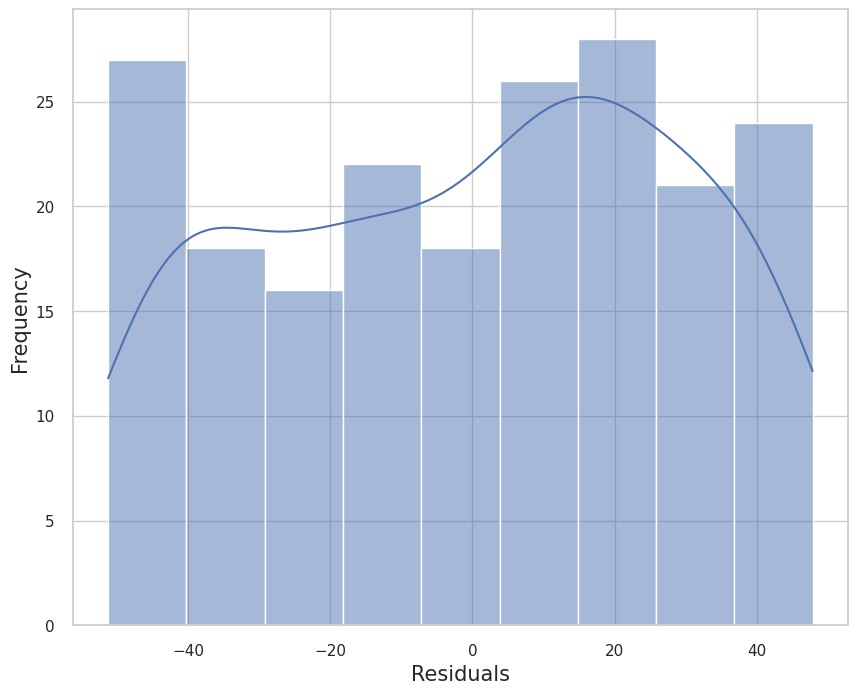

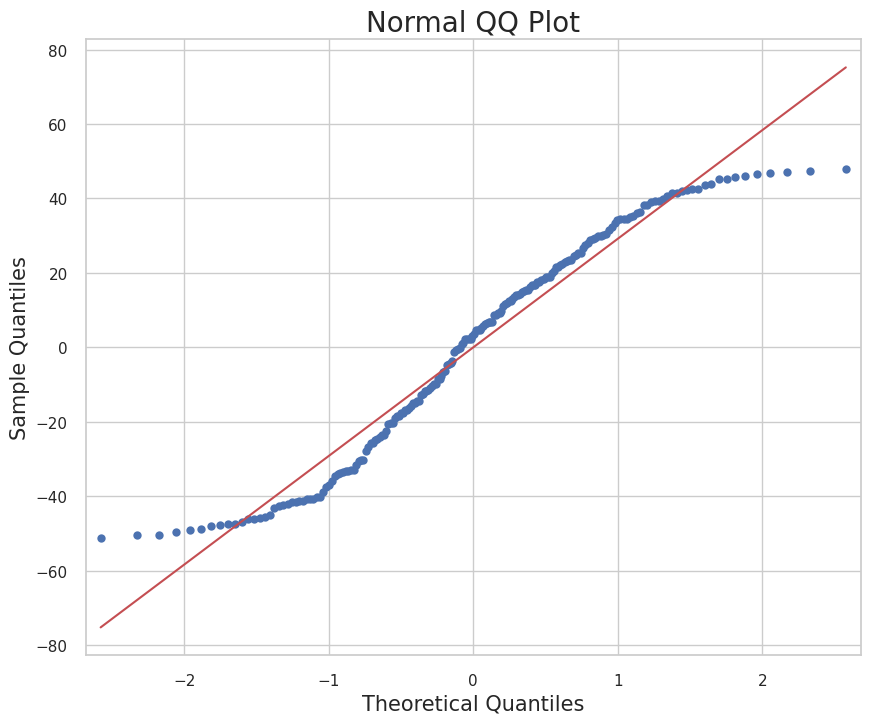

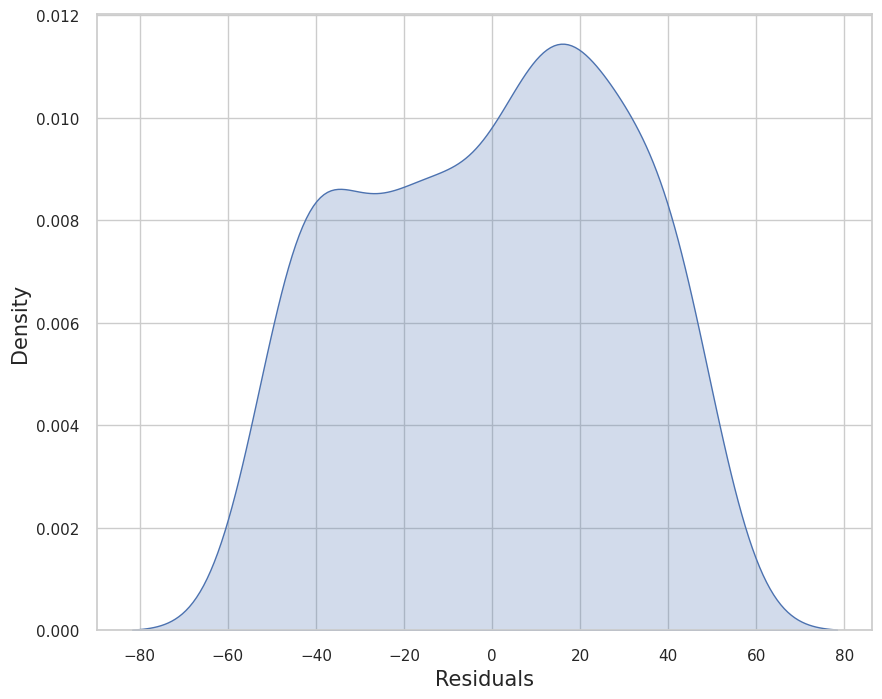

In [168]:
# Creating a histogram of the residuals
sns.histplot(residuals_2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Creating a QQ plot of the residuals
fig_2, ax_2 = plt.subplots()
sm.qqplot(residuals_2, ax=ax_2, line='s')
ax_2.set_title('Normal QQ Plot')
plt.show()

# Creating a density plot of the residuals
sns.kdeplot(residuals_2, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## **Not** quite standard normally distributed anymore, look at the shape of the last graph.

## **Key take-away:**  we try to find/construct/build a model that appoximates the TRUE DGP as close as possible, but that is not a trivial task.